## Problem Statement 

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score

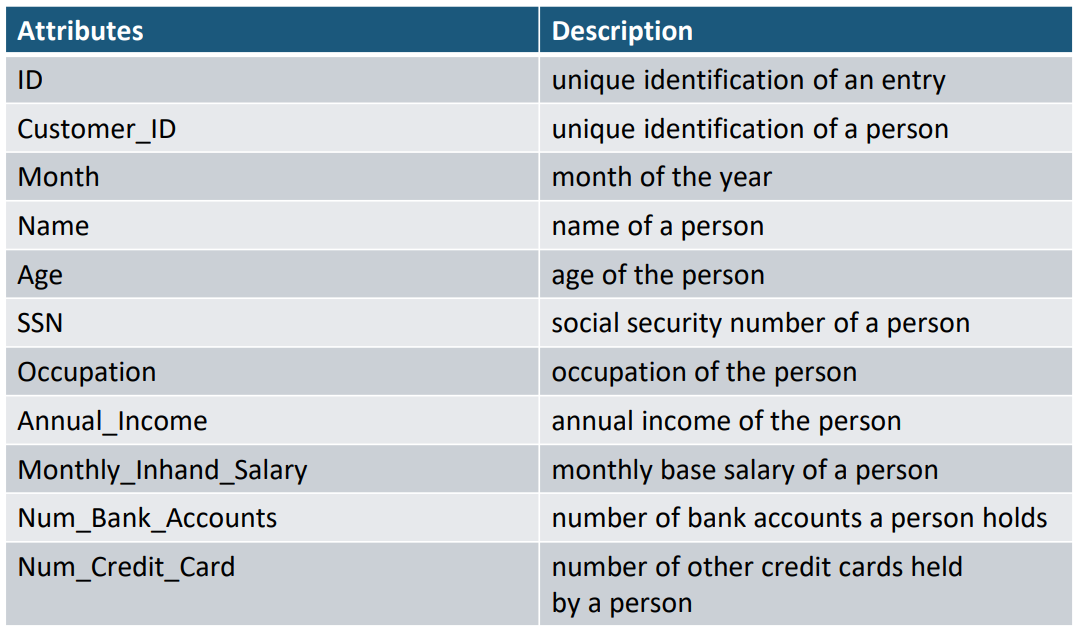
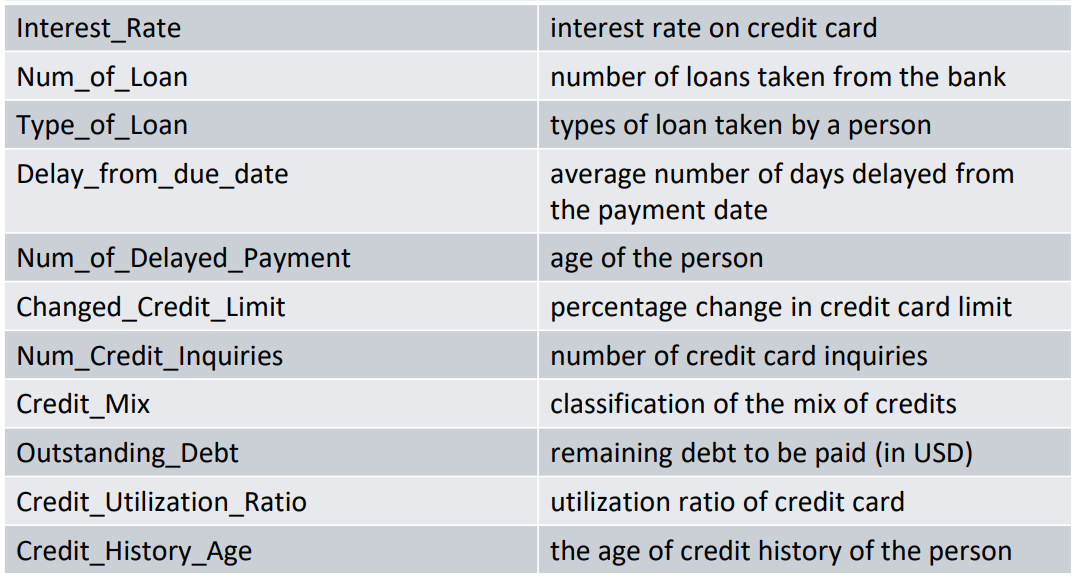
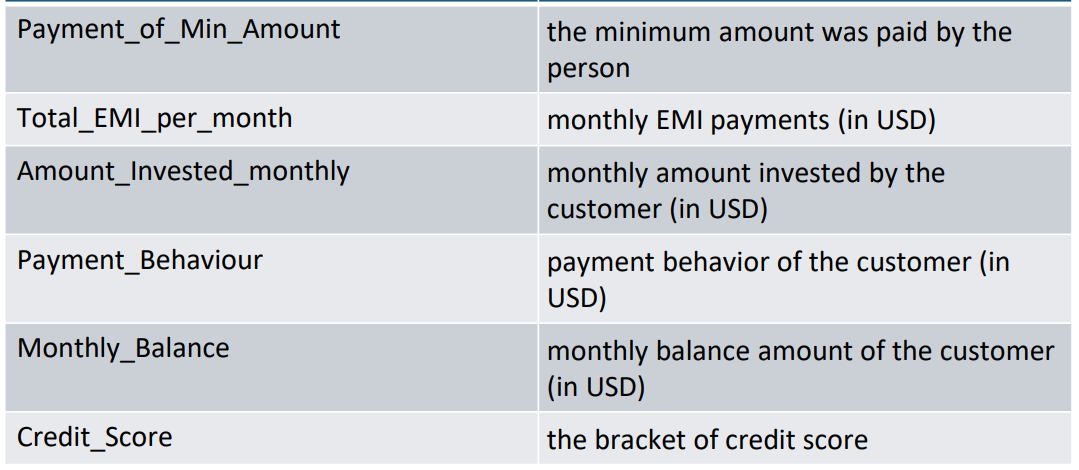

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("Cleaned_Credit_Score.csv")

In [3]:
df.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Auto Loan,Personal Loan,Debt Consolidation Loan,Payday Loan,Credit-Builder Loan,Home Equity Loan,Not Specified,Student Loan,Mortgage Loan,Credit_History_Age_Months
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3.0,4,3,...,1,1,0,0,1,1,0,0,0,265.0
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3.0,4,3,...,1,1,0,0,1,1,0,0,0,264.0
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3.0,4,3,...,1,1,0,0,1,1,0,0,0,267.0
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3.0,4,3,...,1,1,0,0,1,1,0,0,0,268.0
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3.0,4,3,...,1,1,0,0,1,1,0,0,0,269.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Month                      100000 non-null  object 
 2   Name                       100000 non-null  object 
 3   Age                        100000 non-null  int64  
 4   Occupation                 100000 non-null  object 
 5   Annual_Income              100000 non-null  float64
 6   Monthly_Inhand_Salary      100000 non-null  float64
 7   Num_Bank_Accounts          100000 non-null  float64
 8   Num_Credit_Card            100000 non-null  int64  
 9   Interest_Rate              100000 non-null  int64  
 10  Num_of_Loan                100000 non-null  int64  
 11  Delay_from_due_date        100000 non-null  int64  
 12  Num_of_Delayed_Payment     100000 non-null  float64
 13  Changed_Credit_Limit       100

In [5]:
df = df.drop(columns= ['Customer_ID', 'Name'])

## Exploratory Data Analysis

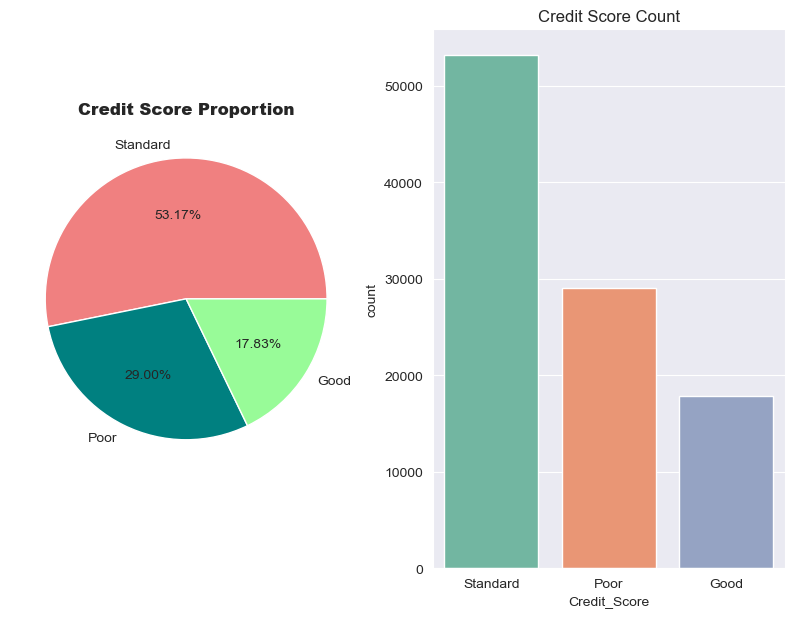

In [6]:
df['Credit_Score']

plt.subplots(1,2, figsize = (10,7))

plt.subplot(121)
plt.pie(x = df['Credit_Score'].value_counts(),
       labels = df['Credit_Score'].value_counts().index,
       colors = ['lightcoral', 'teal', 'palegreen'],
       autopct = '%.2f%%')
plt.title("Credit Score Proportion", weight = 'black')

plt.subplot(122)
sns.countplot(data = df, x = 'Credit_Score',order= df['Credit_Score'].value_counts().index, palette='Set2')
plt.title("Credit Score Count")
plt.show()

In [7]:
num_cols = df.select_dtypes(exclude= 'object').columns
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Auto Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Payday Loan',
       'Credit-Builder Loan', 'Home Equity Loan', 'Not Specified',
       'Student Loan', 'Mortgage Loan', 'Credit_History_Age_Months'],
      dtype='object')

In [8]:
df['Age'].describe()

count    100000.000000
mean         33.253450
std          10.764645
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

In [9]:
def num_plt(column):
    plt.subplots(1,2, figsize = (12,6))

    plt.subplot(121)
    sns.histplot(data = df, x = column, kde = True, hue = 'Credit_Score', palette= 'Set1')
    plt.title(f"Distribution of {column}")

    plt.subplot(122)
    sns.boxplot(data = df, x = 'Credit_Score', y = column, palette= 'Set3')
    plt.title(f"Distribution of {column} per Credit_Score")
    plt.show()

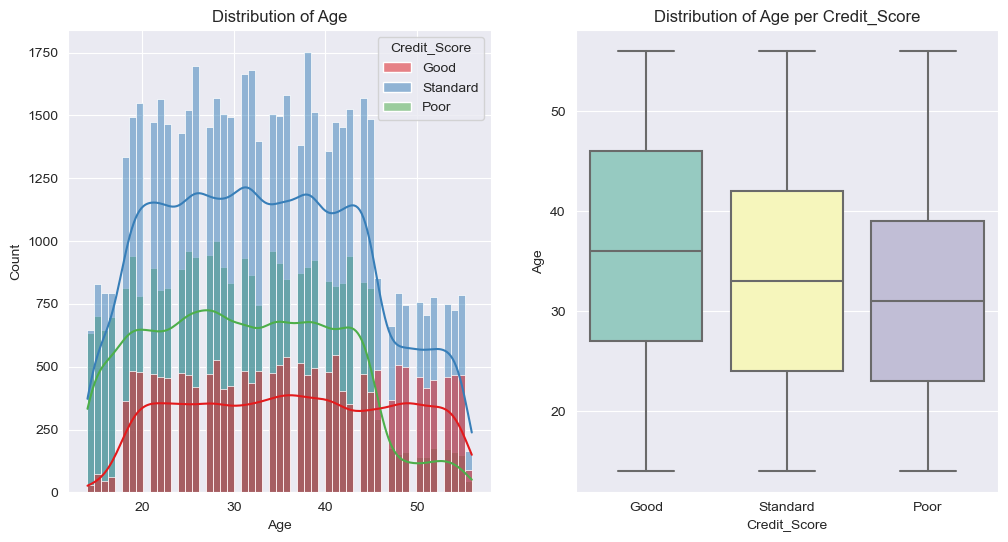

In [10]:
num_plt('Age')

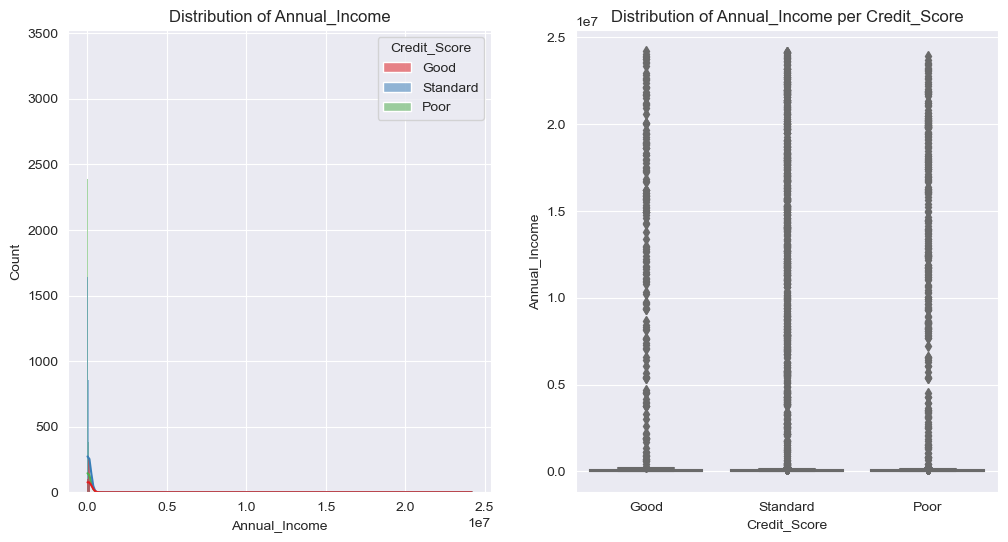

In [11]:
num_plt('Annual_Income')

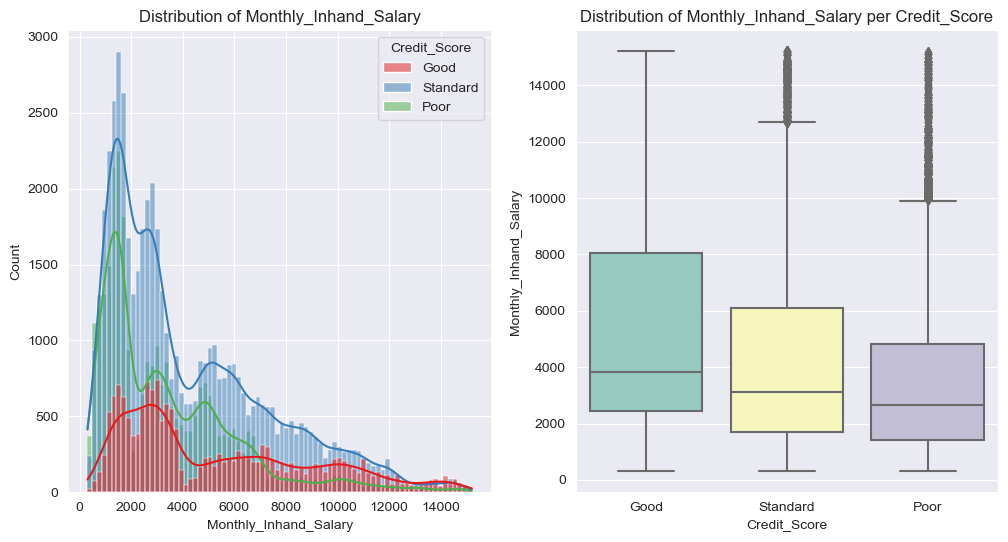

In [12]:
num_plt('Monthly_Inhand_Salary')

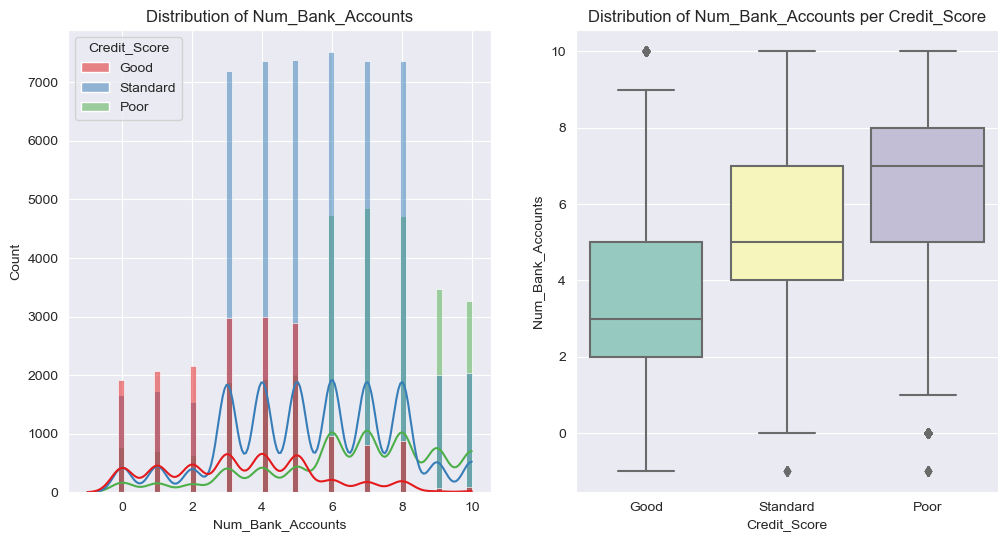

In [13]:
num_plt('Num_Bank_Accounts')

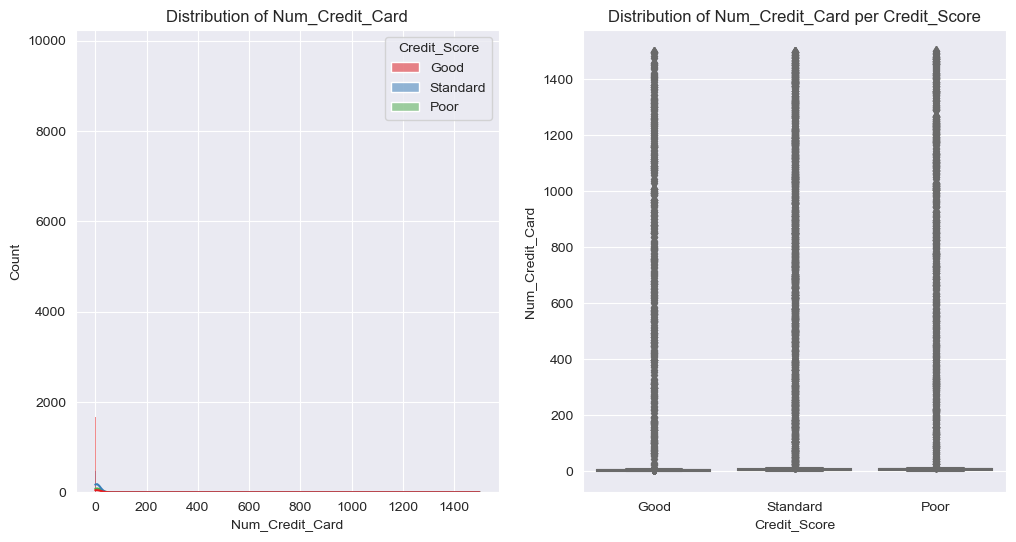

In [14]:
num_plt('Num_Credit_Card')

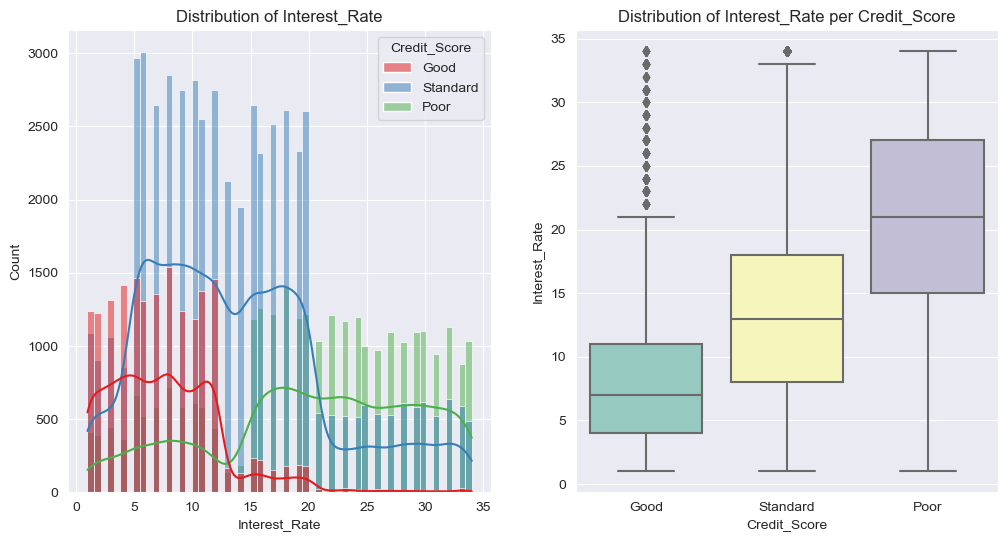

In [15]:
num_plt('Interest_Rate')

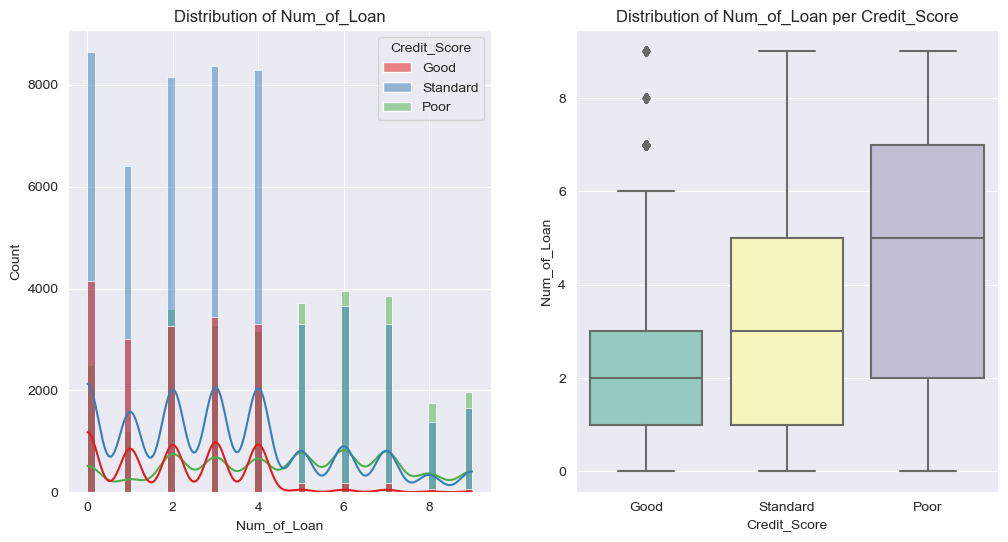

In [16]:
num_plt('Num_of_Loan')

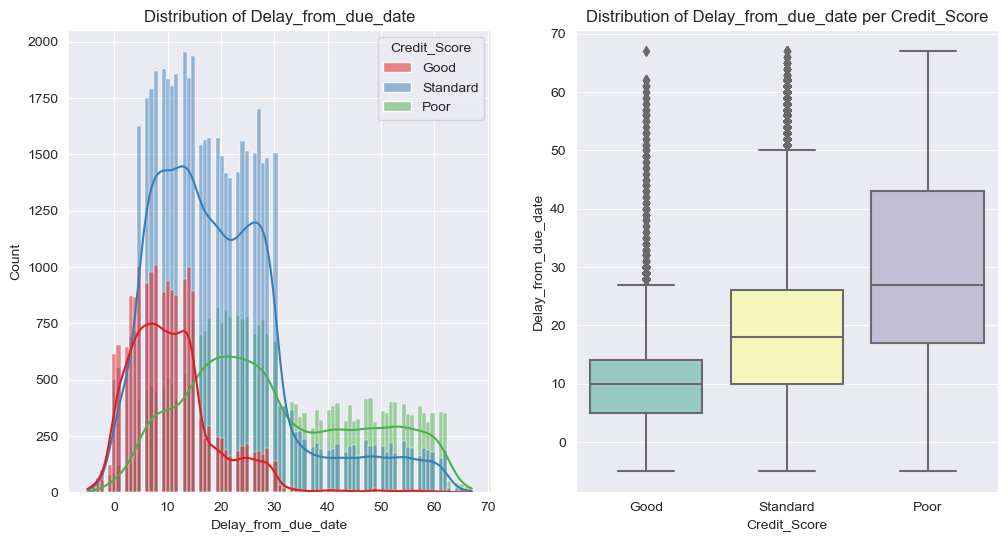

In [17]:
num_plt('Delay_from_due_date')

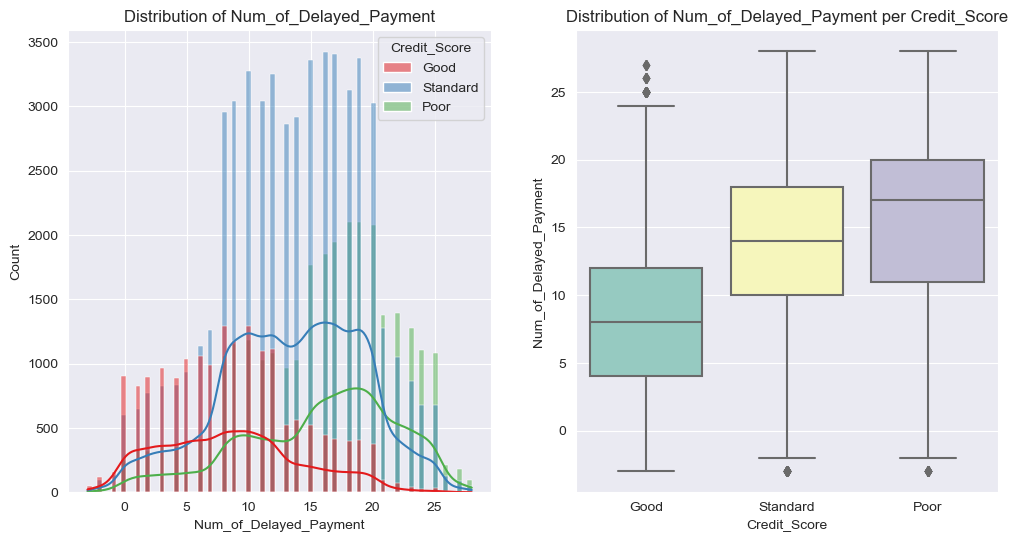

In [18]:
num_plt('Num_of_Delayed_Payment')

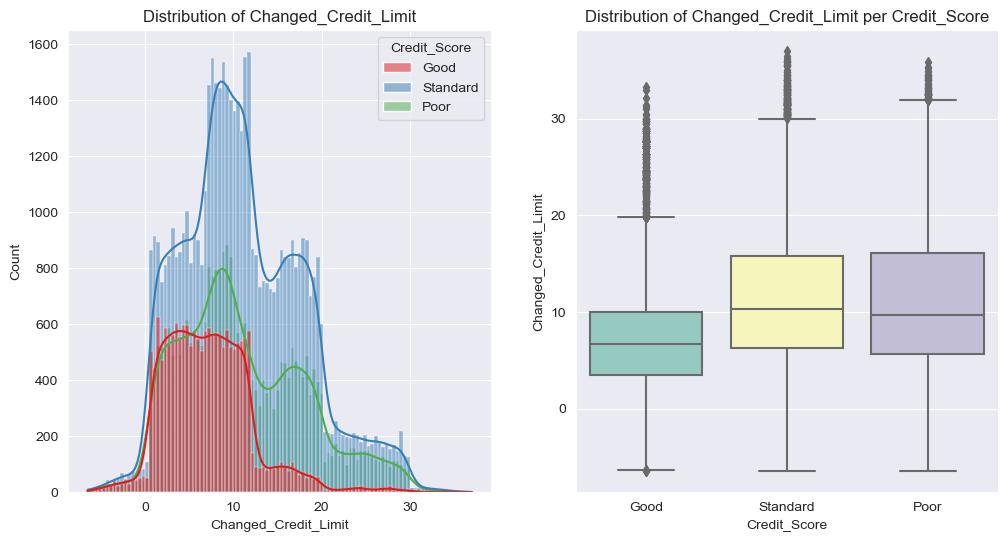

In [19]:
num_plt('Changed_Credit_Limit')

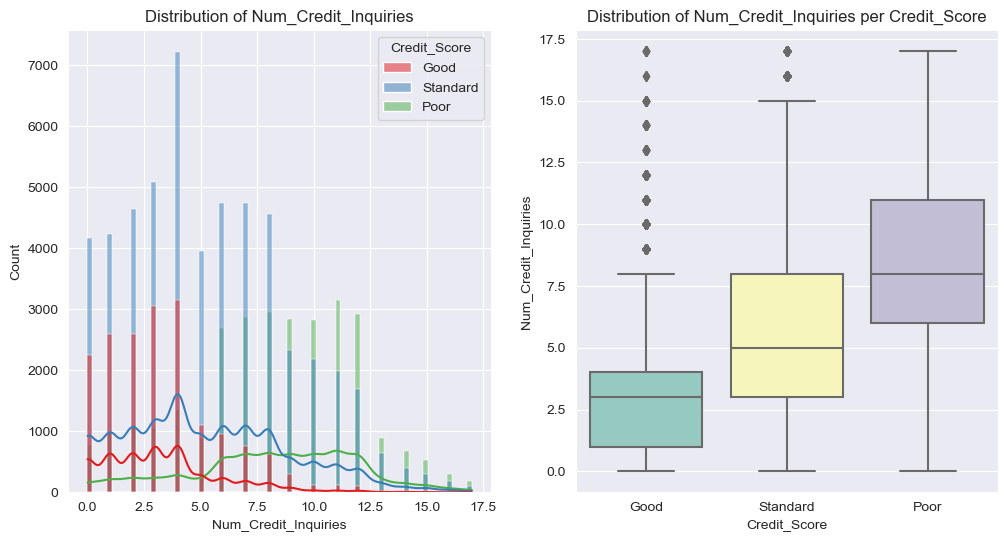

In [20]:
num_plt('Num_Credit_Inquiries')


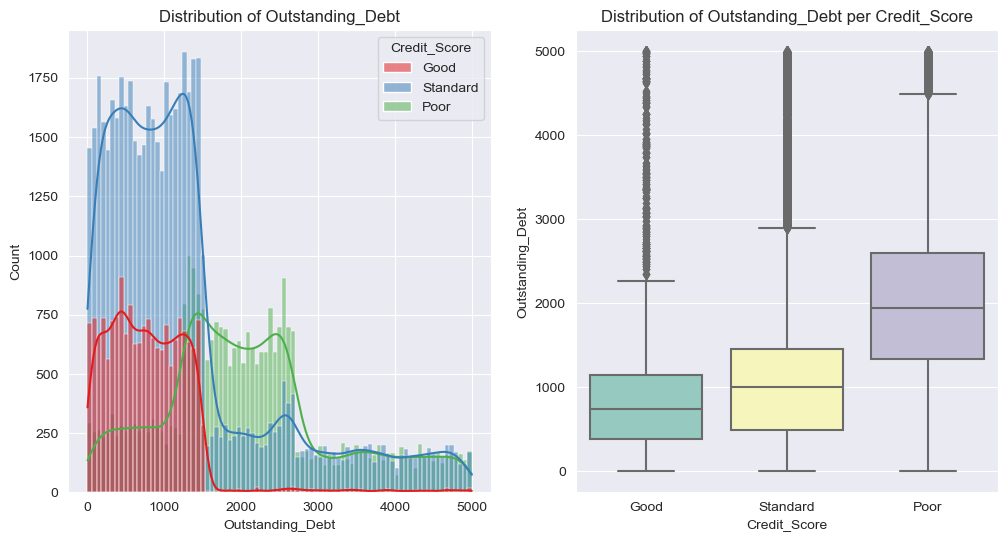

In [21]:
num_plt('Outstanding_Debt')


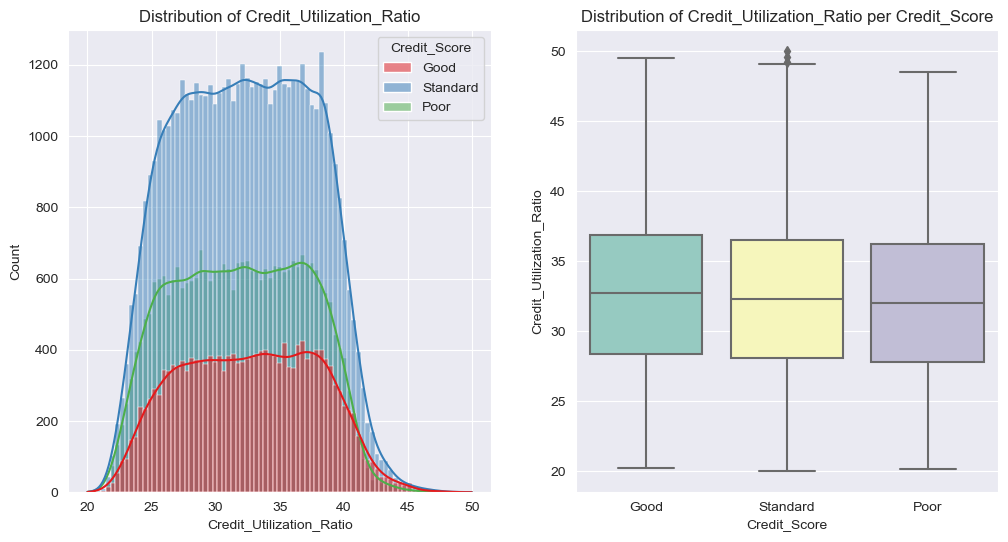

In [22]:
num_plt('Credit_Utilization_Ratio')


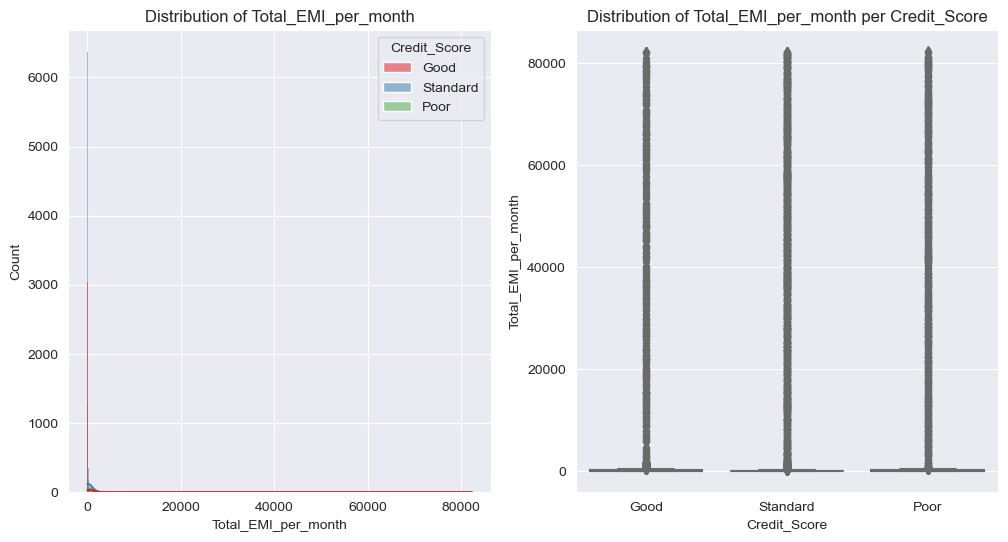

In [23]:
num_plt('Total_EMI_per_month')


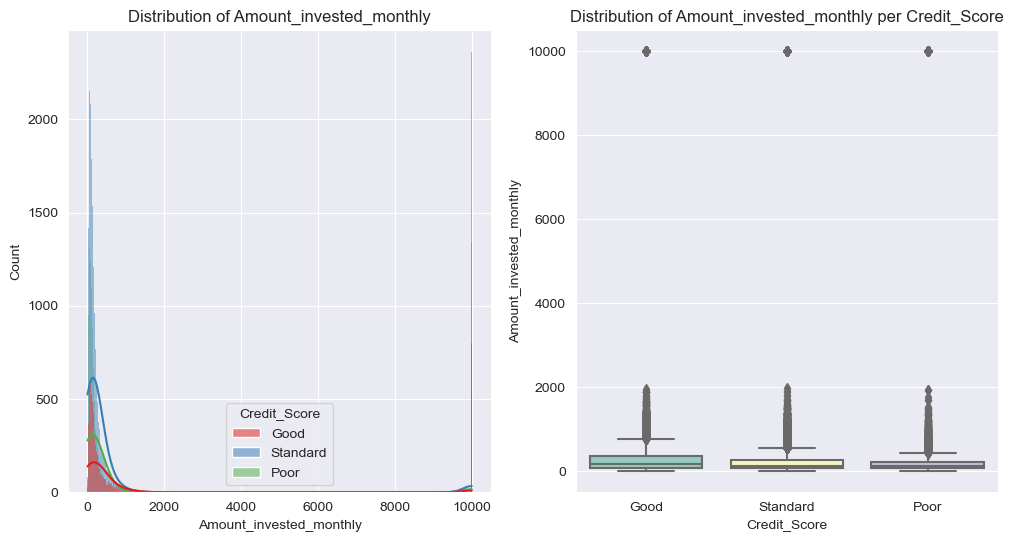

In [24]:
num_plt('Amount_invested_monthly')


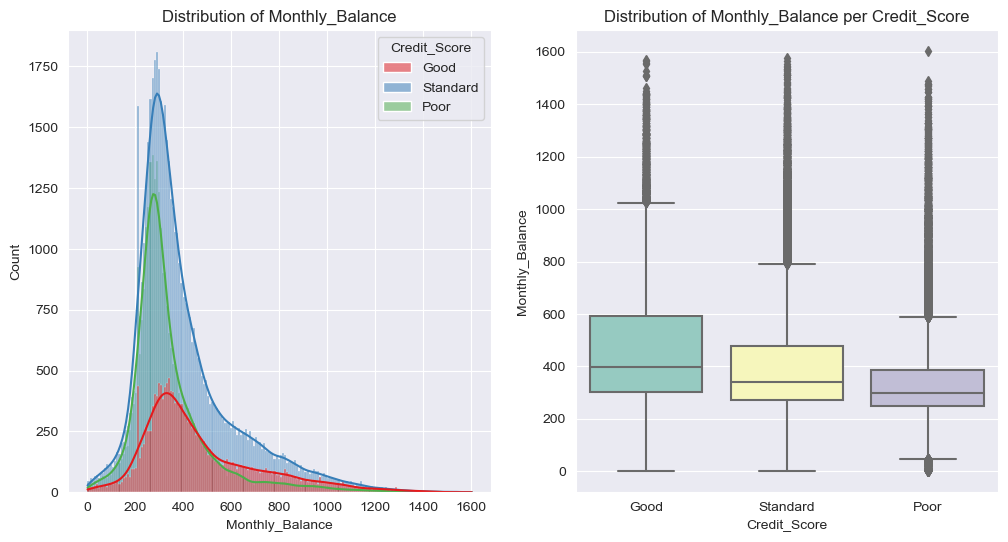

In [25]:
num_plt('Monthly_Balance')

In [26]:
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

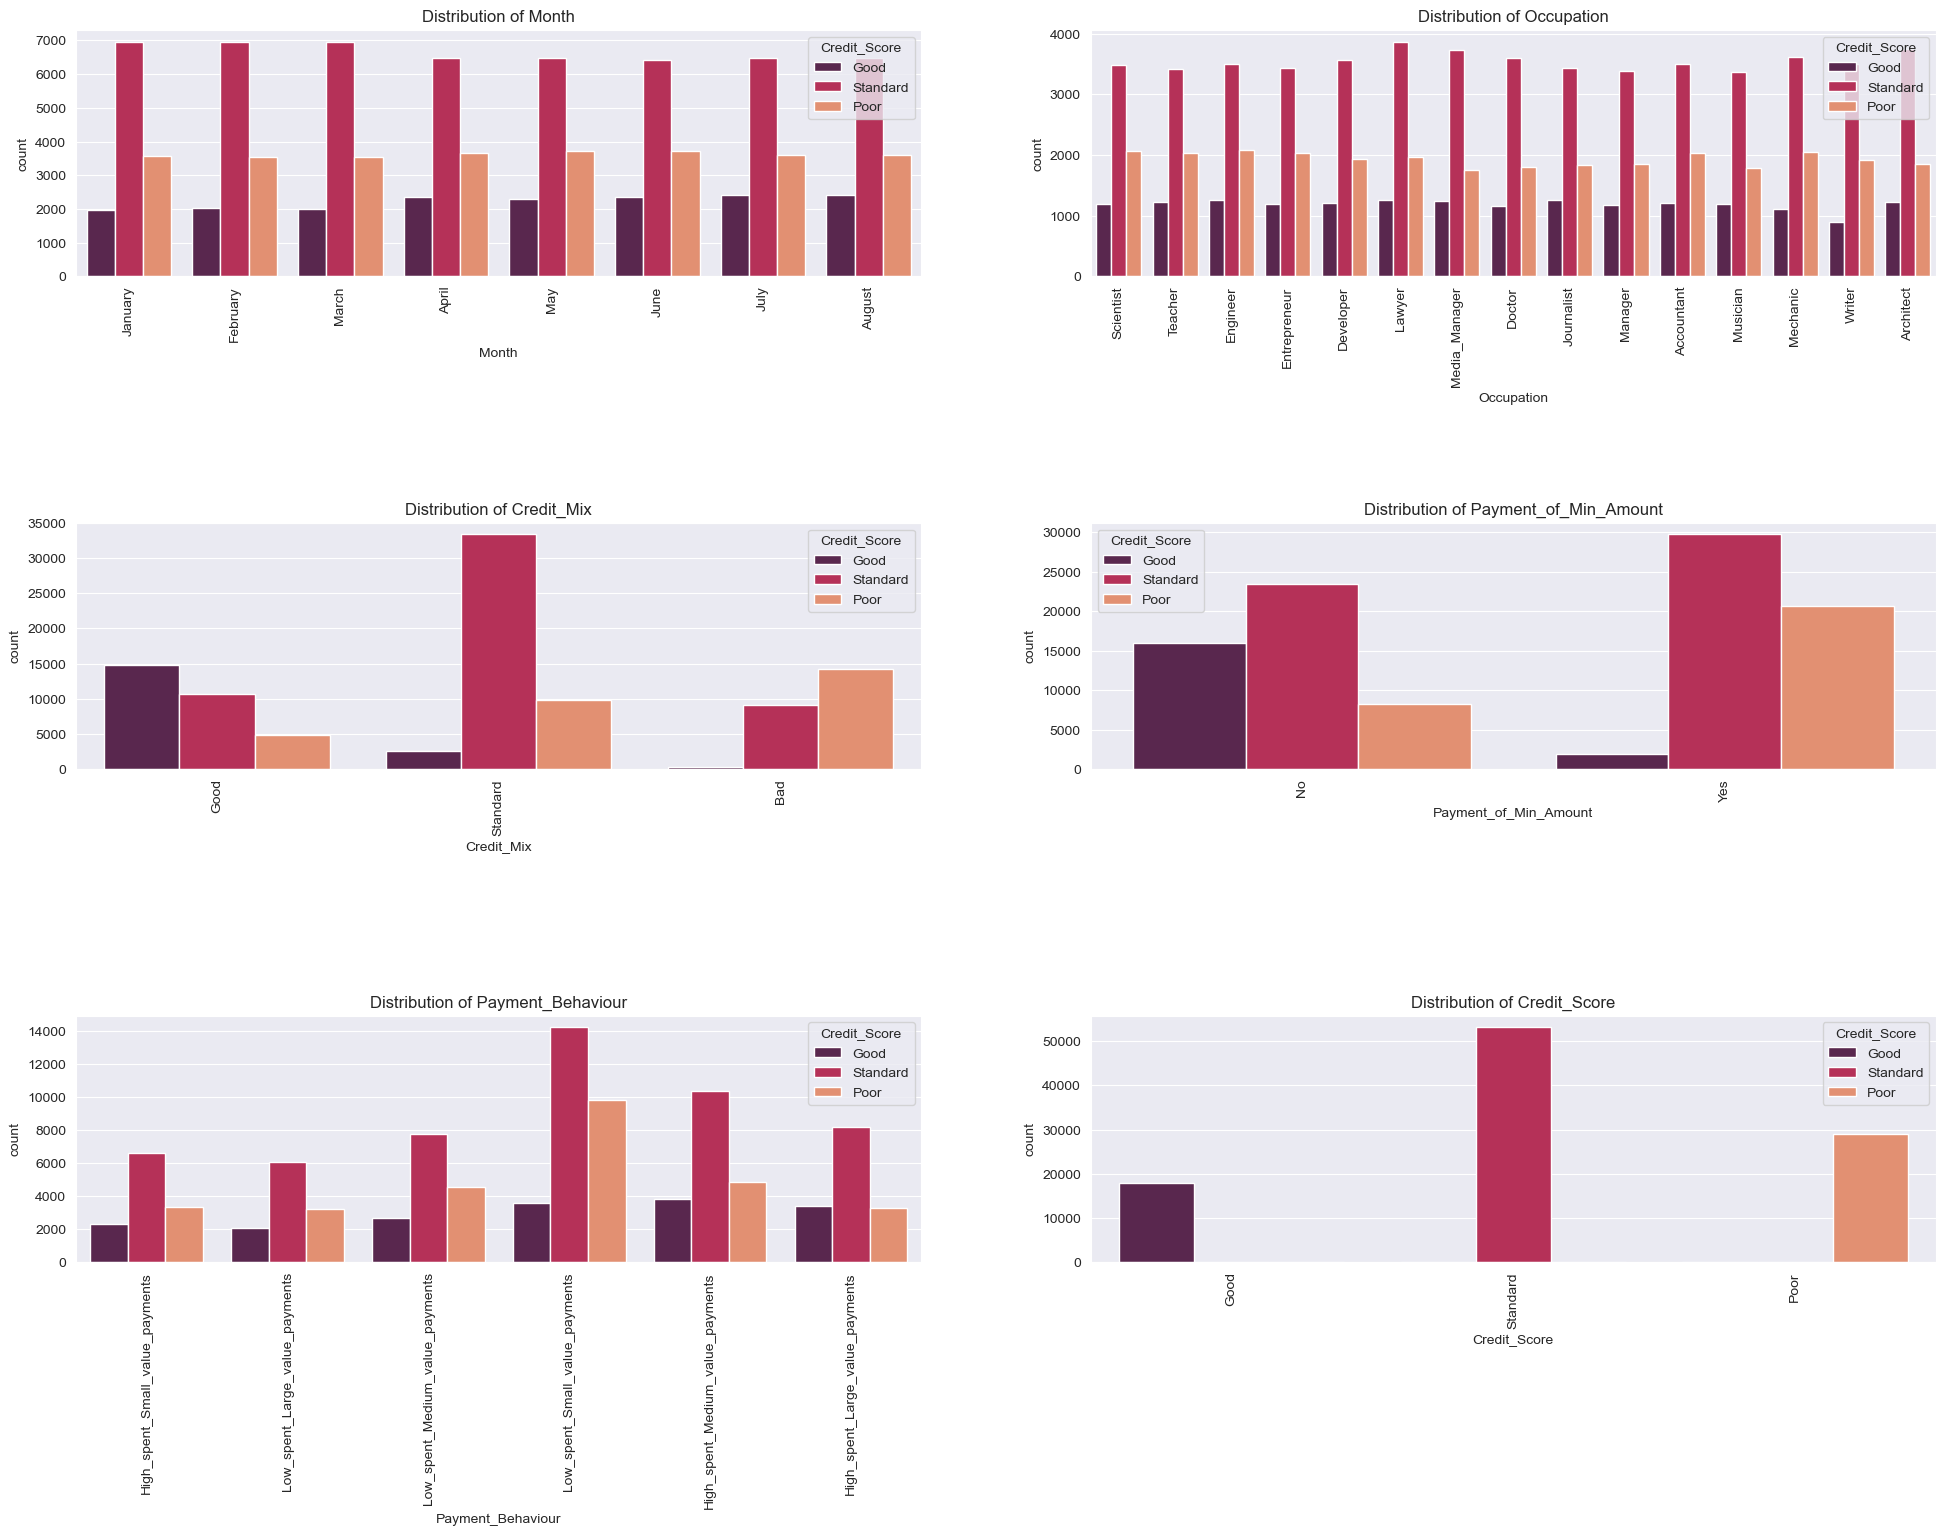

In [27]:
plt.subplots(3,2,figsize = (24,16))

num = 1
for i, col in enumerate(cat_cols):
    plt.subplot(3,2,num)
    sns.countplot(data = df, x = col, hue = 'Credit_Score' , palette= 'rocket')
    plt.xticks(rotation = 90)
    plt.title(f"Distribution of {col}")
    num +=1

plt.subplots_adjust(hspace = 1)
plt.show()

## Model Building

In [28]:
from sklearn.model_selection import train_test_split

df = df.sample(frac = 1, random_state= 42) ## shuffling data
X = df.drop(columns = ['Num_of_Loan', 'Credit_Score']) ##redundant feature
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   stratify=y,
                                                   random_state=42)

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


ordinal_cols = ['Month', 'Payment_of_Min_Amount']
ohe_cols = ['Occupation','Payment_Behaviour', ]
label = ['Credit_Mix']
sc_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

cat1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August']
cat2 = ['No', 'Yes']

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


le1 = LabelEncoder()
le1.fit(X_train['Credit_Mix'])
X_train['Credit_Mix'] =le1.transform(X_train['Credit_Mix'])
X_test['Credit_Mix'] = le1.transform(X_test['Credit_Mix'])

oe = OrdinalEncoder(categories=[cat1, cat2])
ohe = OneHotEncoder()
sc= StandardScaler()

ct = ColumnTransformer(transformers=[
    ('ordinal', oe,  ordinal_cols),
    ('OneHot', ohe, ohe_cols),
    ('scaler', sc, sc_cols)
],
                      remainder = 'passthrough')

ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_enc, y_train)
y_pred_lr = lr.predict(X_test_enc)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression Model is: {lr_accuracy}")

Accuracy of Logistic Regression Model is: 0.6243


In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_enc, y_train)
y_pred_dtc = dtc.predict(X_test_enc)
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
print(f"Accuracy of Decision Tree Classifier Model is: {dtc_accuracy}")

Accuracy of Decision Tree Classifier Model is: 0.7252


In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_enc, y_train)
y_pred_rfc = rfc.predict(X_test_enc)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy of Random Forest Classifier Model is: {rfc_accuracy}")

Accuracy of Random Forest Classifier Model is: 0.8232


In [35]:
from sklearn.ensemble import AdaBoostClassifier

adbc = AdaBoostClassifier()
adbc.fit(X_train_enc, y_train)
y_pred_adbc = adbc.predict(X_test_enc)
adbc_accuracy = accuracy_score(y_test, y_pred_adbc)
print(f"Accuracy of Random Forest Classifier Model is: {adbc_accuracy}")

Accuracy of Random Forest Classifier Model is: 0.6485


In [38]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()
xgbc.fit(X_train_enc, y_train)
y_pred_xgbc = xgbc.predict(X_test_enc)
xgbc_accuracy = accuracy_score(y_test, y_pred_xgbc)
print(f"Accuracy of Random Forest Classifier Model is: {xgbc_accuracy}")

Accuracy of Random Forest Classifier Model is: 0.7722
